# Setup & Imports

In [2]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 5)

# Load dataset
df = pd.read_csv("../data/raw/churn_data.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Basic Overview

In [3]:
# Basic structure
df.info()

# Shape of the data
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Check for missing values
df.isnull().sum()

# Quick statistics
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
Rows: 10000, Columns: 12


,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


# Target Variable Overview

churn
0    7963
1    2037
Name: count, dtype: int64
churn
0    79.63
1    20.37
Name: count, dtype: float64


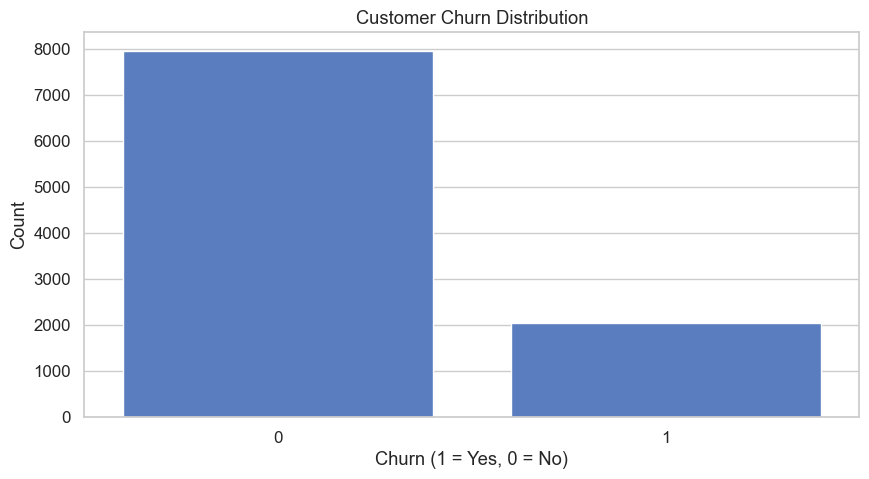

In [4]:
# Distribution of churned vs retained customers
churn_counts = df['churn'].value_counts()
churn_percent = churn_counts / len(df) * 100

print(churn_counts)
print(churn_percent)

sns.countplot(x='churn', data=df)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

### Findings: churn rate is around 20%

# Categorical Feature Exploration

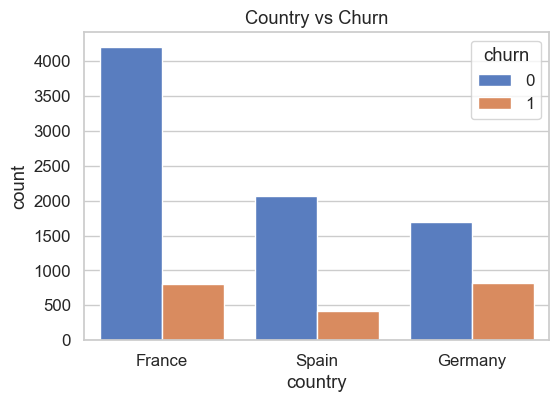

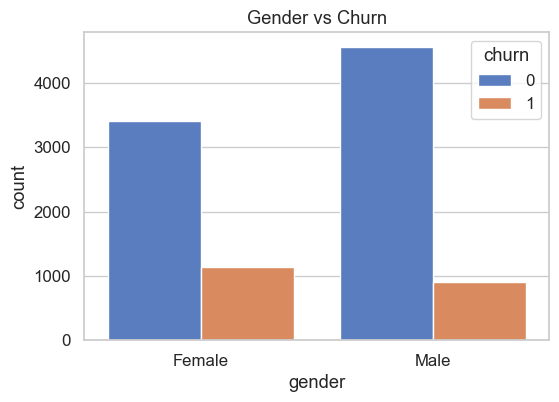

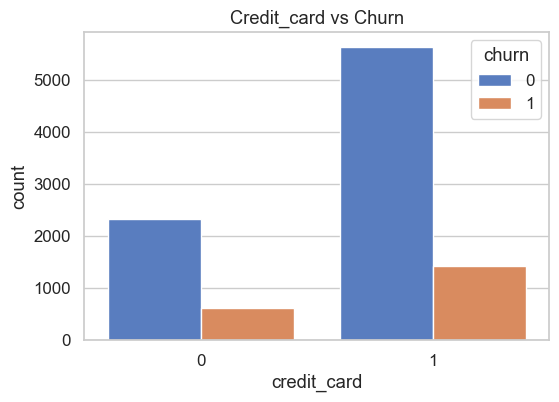

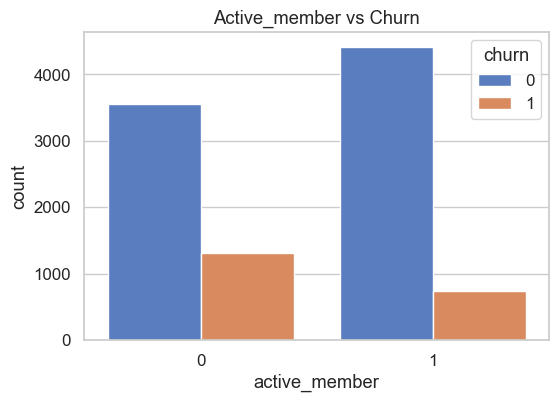

In [5]:
categorical_features = ['country', 'gender', 'credit_card', 'active_member']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='churn', data=df)
    plt.title(f'{col.capitalize()} vs Churn')
    plt.show()


# Numerical Feature Exploration

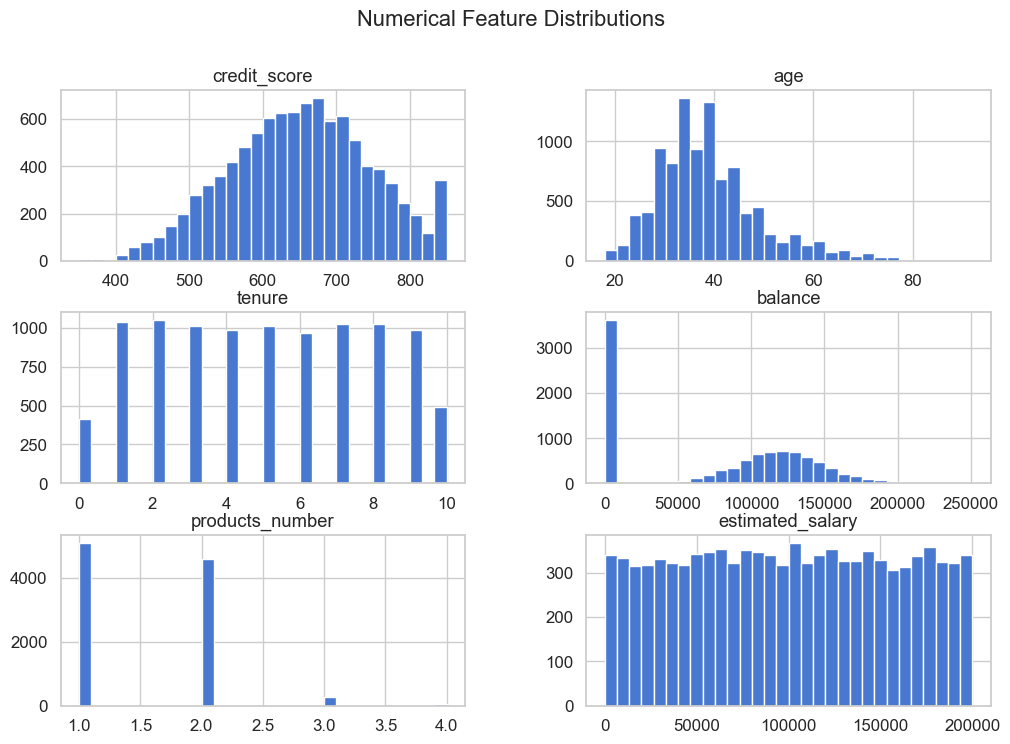

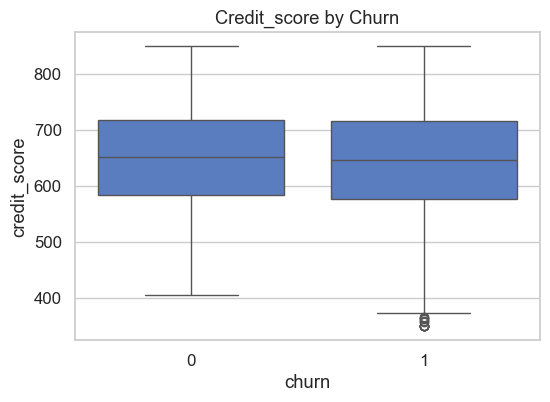

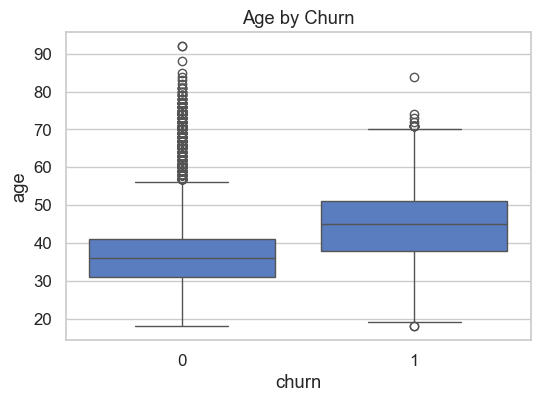

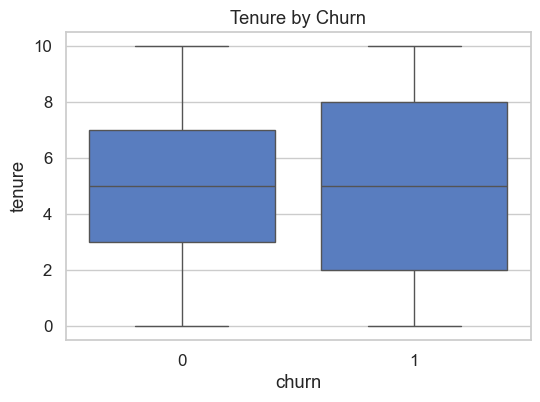

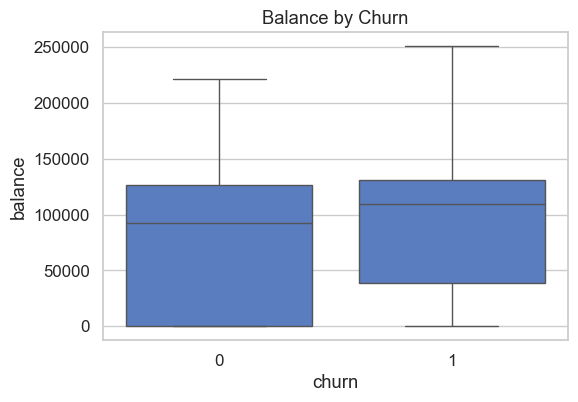

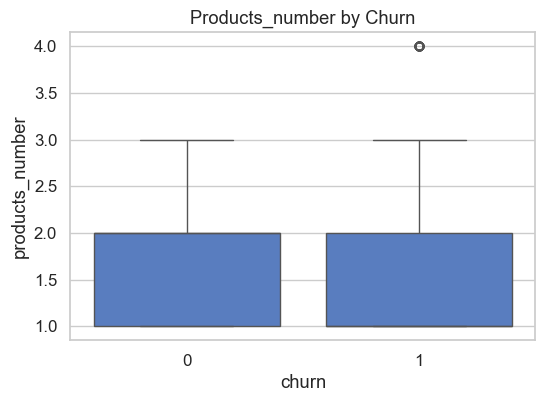

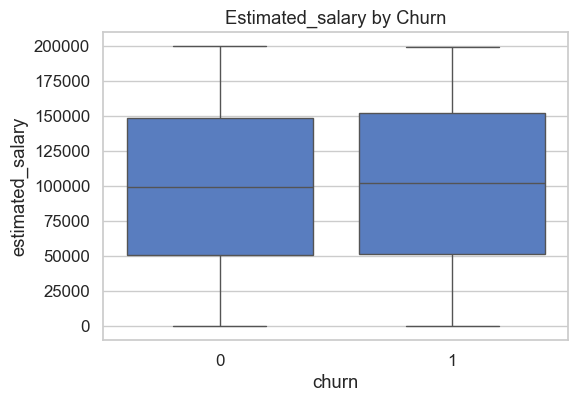

In [7]:
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Histograms for distributions
df[numeric_features].hist(bins=30, figsize=(12, 8))
plt.suptitle("Numerical Feature Distributions")
plt.show()

# Boxplots vs churn
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'{col.capitalize()} by Churn')
    plt.show()


# Correlation Analysis

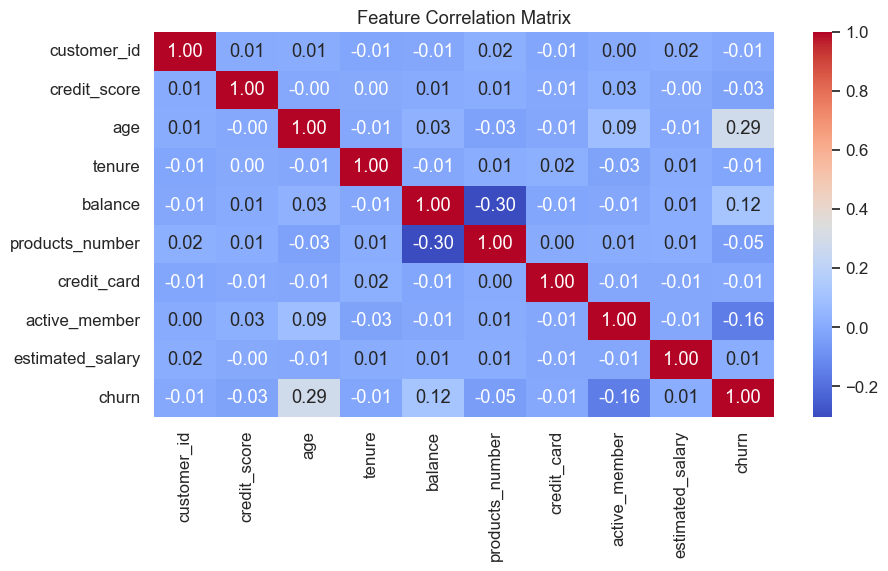

churn               1.000000
age                 0.285323
balance             0.118533
estimated_salary    0.012097
customer_id        -0.006248
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
active_member      -0.156128
Name: churn, dtype: float64


In [12]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Matrix')
plt.show()

# Correlation with target variable
corr_target = corr['churn'].sort_values(ascending=False)
print(corr_target)


# Country-Level Aggregation

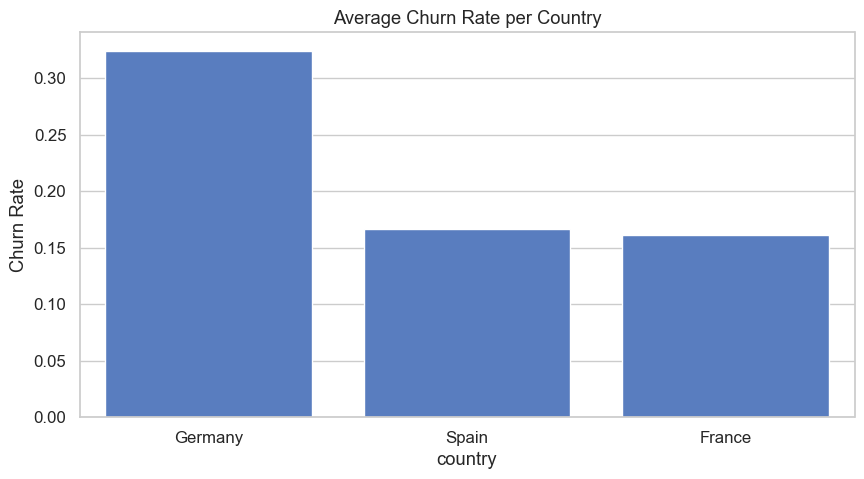

In [9]:
country_churn = df.groupby('country')['churn'].mean().sort_values(ascending=False)
sns.barplot(x=country_churn.index, y=country_churn.values)
plt.title('Average Churn Rate per Country')
plt.ylabel('Churn Rate')
plt.show()


# Feature Interactions

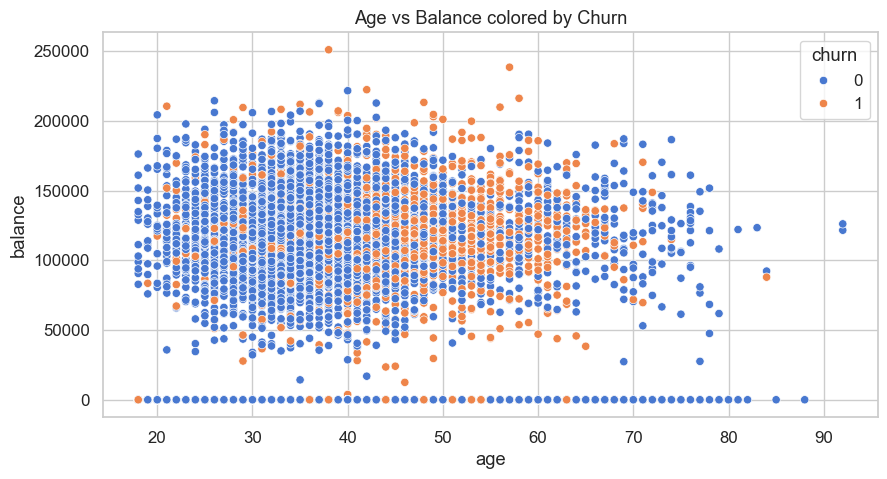

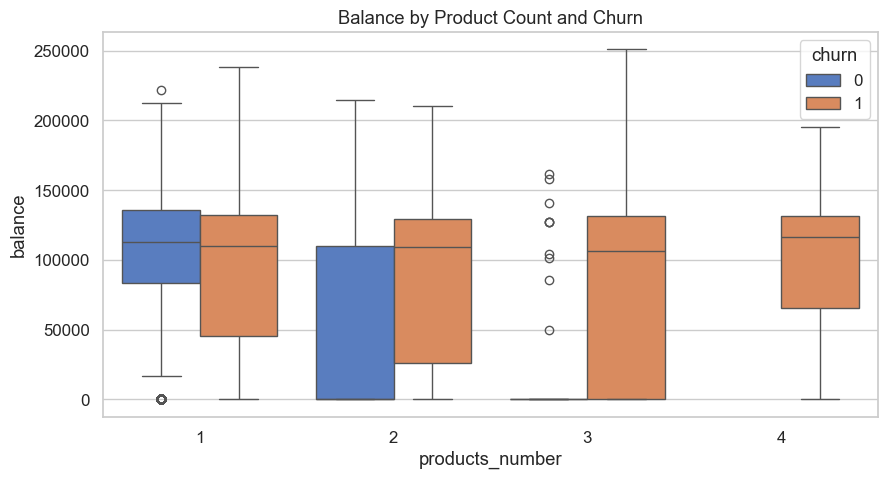

In [11]:
sns.scatterplot(x='age', y='balance', hue='churn', data=df)
plt.title('Age vs Balance colored by Churn')
plt.show()

sns.boxplot(x='products_number', y='balance', hue='churn', data=df)
plt.title('Balance by Product Count and Churn')
plt.show()


# Summary Observations

- Around 20% of customers churned.
- Older customers and non-active members churn more.
- Customers with low credit score or high balance seem more likely to churn.
- Country differences (e.g., Germany higher churn than Spain/France).

# Save for Next Step (Optional, since no changes were made)

In [13]:
df.to_csv("../data/processed/exploration_clean.csv", index=False)